Eğitim Doğruluğu: 0.9833333333333333
Test Doğruluğu: 1.0


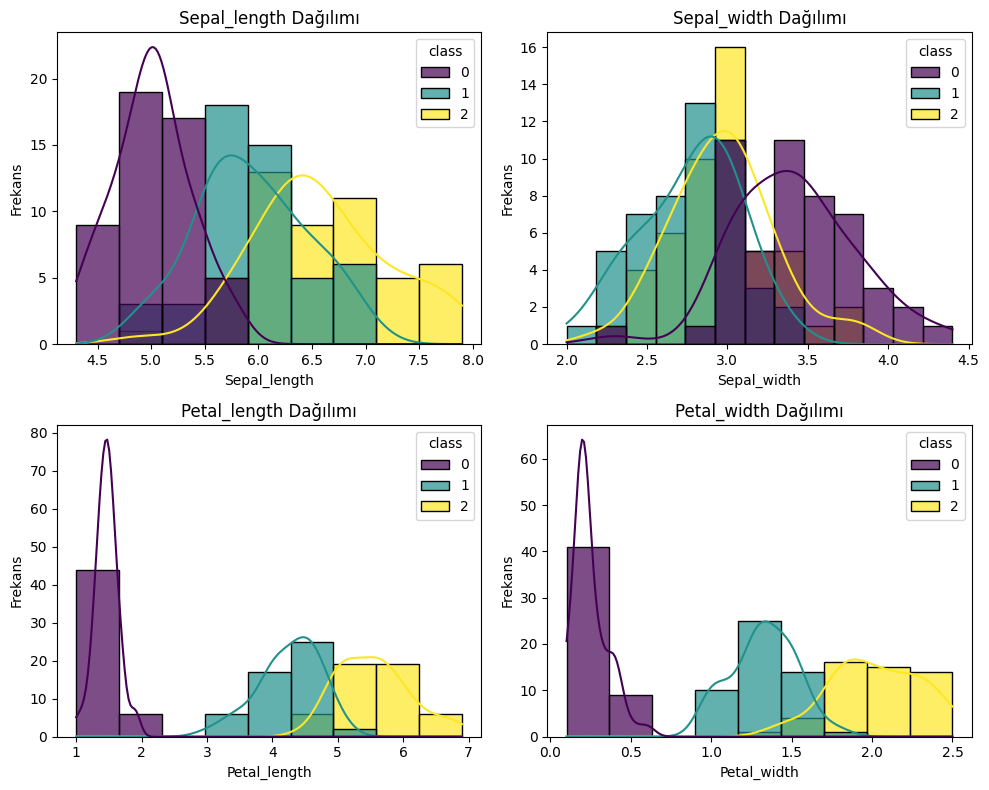

<ipython-input-1-b2dd58944f82>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='class', y=feature, palette='viridis', legend=False)
<ipython-input-1-b2dd58944f82>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='class', y=feature, palette='viridis', legend=False)
<ipython-input-1-b2dd58944f82>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='class', y=feature, palette='viridis', legend=False)
<ipython-input-1-b2dd58944f82>:61: FutureWarning: 

Passing `palette` without assigning `hue` is 

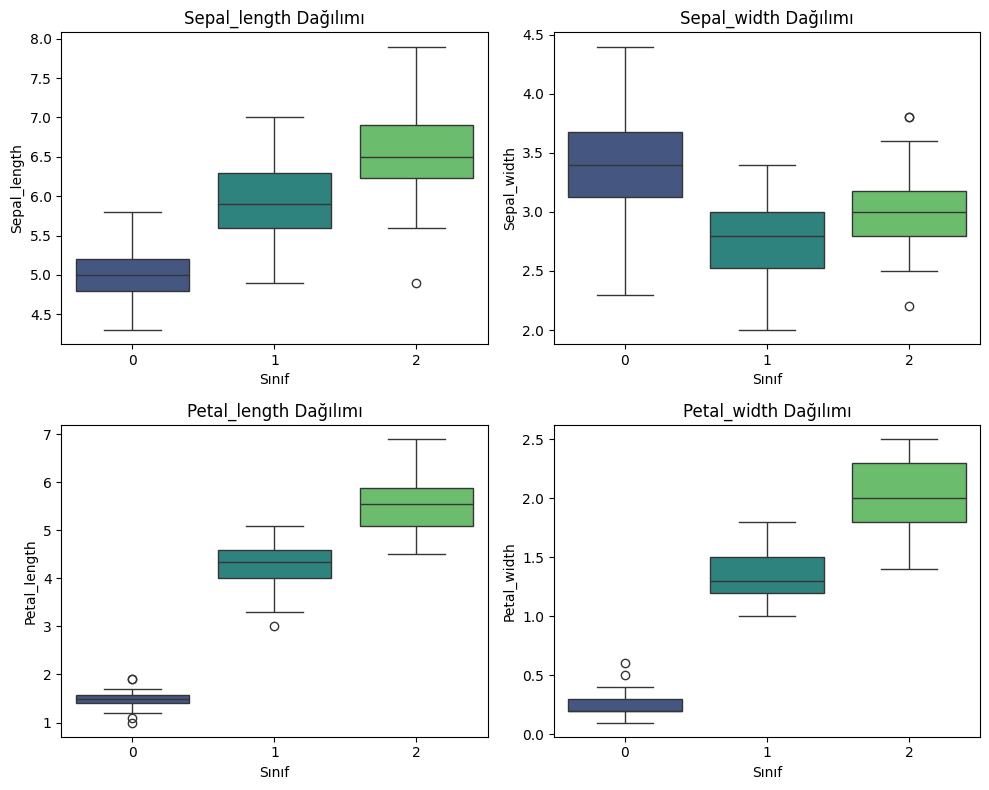

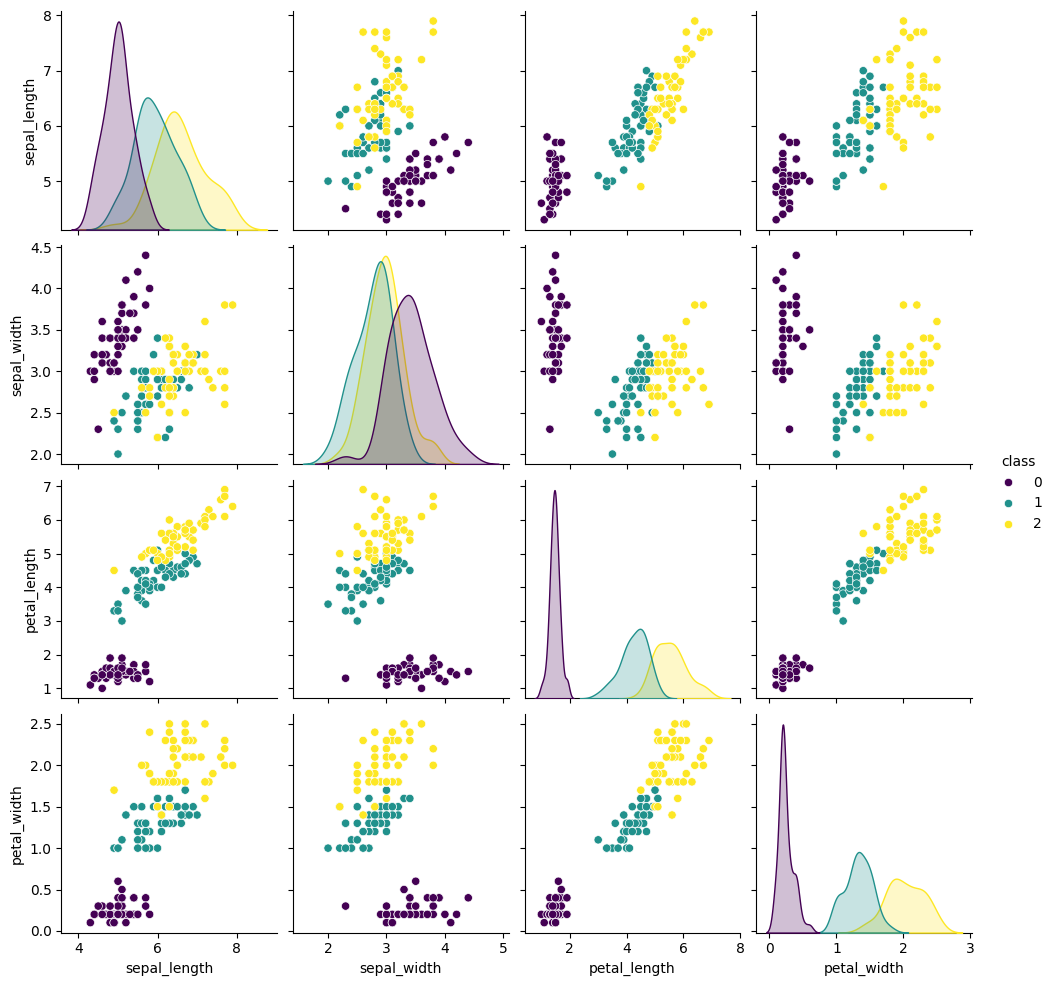

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

class_names = iris_df['class'].unique()
iris_df['class'] = iris_df['class'].map({class_name: i for i, class_name in enumerate(class_names)})


iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype(float)


X = iris_df.drop('class', axis=1)
y = iris_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_poly, y_train)


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Eğitim Doğruluğu:", train_accuracy)
print("Test Doğruluğu:", test_accuracy)

plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='class', kde=True, palette='viridis', alpha=0.7)
    plt.title(f"{feature.capitalize()} Dağılımı")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=iris_df, x='class', y=feature, palette='viridis', legend=False)
    plt.title(f"{feature.capitalize()} Dağılımı")
    plt.xlabel("Sınıf")
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

sns.pairplot(iris_df, hue='class', palette='viridis')
plt.show()
